# SESSION: Simulating time series signal and noise #3.29. Non-stationary narrowband activity via filtered noise

COURSE: Neural signal processing and analysis: Zero to hero

TEACHER: Mike X Cohen, sincxpress.com

**Goal:** Simulate some "brain-like" data with non-stationary narrowband activity + noise

In [8]:
# Remember to always import first!

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# simulation details
pnts = 4567
srate = 987

# signal params in Hz
peakfreq = 14
fwhm = 5

# frequencies
hz = np.linspace(0,srate,num=pnts) 

# random number generator
rng = np.random.default_rng() # optional = set seed to an integer to lock in the rng

In [10]:
# create frequency domain gaussian
s = fwhm*(2*np.pi-1)/(4*np.pi) # normalized width
x = hz-peakfreq # shifted frequencies
fg = np.exp(-.5*np.power((x/s),2)) # the gaussian
# fourier coefficients of random spectrum
fc = np.multiply(rng.random(pnts),np.exp(1j*2*np.pi*rng.random(pnts)))

# taper with guassian
fc = np.multiply(fc,fg)

# go back to time domain to get EEG data
signal = 2*np.real(np.fft.ifft(fc))

Now, we can plot the signal

Text(0.5, 1.0, 'Time Domain')

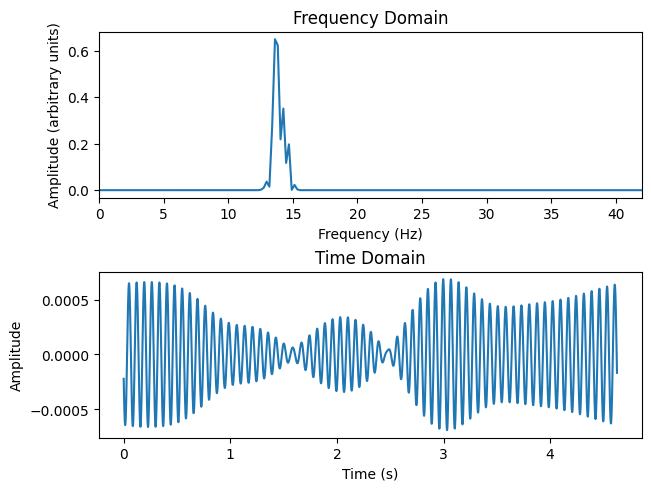

In [11]:
time = np.linspace(0,pnts/srate,num=pnts)
fig = plt.figure(layout="constrained")
ax_dict = fig.subplot_mosaic(
    [
        ["freq"],
        ["signal"]
    ]
)

ax_dict["freq"].plot(hz,abs(fc))
ax_dict["freq"].set_xlim((0,peakfreq*3))
ax_dict["freq"].set_xlabel("Frequency (Hz)")
ax_dict["freq"].set_ylabel("Amplitude (arbitrary units)")
ax_dict["freq"].set_title("Frequency Domain")

ax_dict["signal"].plot(time,signal)
ax_dict["signal"].set_xlabel("Time (s)")
ax_dict["signal"].set_ylabel("Amplitude")
ax_dict["signal"].set_title("Time Domain")